In [4]:
!ls /content/

Crypto_historical_data.csv  sample_data


In [30]:
import pandas as pd

df = pd.read_csv('/content/Crypto_historical_data.csv', encoding='utf-8')
print("Chargement réussi !")
df.head()


Chargement réussi !


,Date,Open,High,Low,Close,Volume,ticker,name
0,2017-11-09 00:00:00+00:00,0.001207,0.001415,0.001181,0.001415,6259550,DOGE-USD,Dogecoin
1,2017-11-10 00:00:00+00:00,0.001421,0.001431,0.001125,0.001163,4246520,DOGE-USD,Dogecoin
2,2017-11-11 00:00:00+00:00,0.001146,0.001257,0.001141,0.001201,2231080,DOGE-USD,Dogecoin
3,2017-11-12 00:00:00+00:00,0.001189,0.001210,0.001002,0.001038,3288960,DOGE-USD,Dogecoin
4,2017-11-13 00:00:00+00:00,0.001046,0.001212,0.001019,0.001211,2481270,DOGE-USD,Dogecoin


In [11]:
# Aperçu rapide du dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343372 entries, 0 to 343371
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    343372 non-null  object 
 1   Open    342038 non-null  float64
 2   High    342038 non-null  float64
 3   Low     342038 non-null  float64
 4   Close   343372 non-null  float64
 5   Volume  343372 non-null  int64  
 6   ticker  343372 non-null  object 
 7   name    343372 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.0+ MB


In [12]:
# Nettoyage des noms de colonnes : tout en minuscule et sans espaces
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

print("Colonnes normalisées:")
print(df.columns.tolist())


Colonnes normalisées:
['date', 'open', 'high', 'low', 'close', 'volume', 'ticker', 'name']


In [50]:
# Supprimer les lignes dupliquées
df = df.drop_duplicates()

# Remplacer les valeurs manquantes par 0 ou "Unknown"
df = df.fillna({
    'name': 'Unknown',
    'ticker': 'Unknown', # Corrected 'symbol' to 'ticker'
    'open': 0,
    'high': 0, # Added fillna for 'high' and 'low'
    'low': 0,
    'close': 0,
    'volume': 0 # Ensure volume missing values are filled
})

print("Doublons supprimés et valeurs manquantes gérées")

Doublons supprimés et valeurs manquantes gérées


In [15]:
# Conversion de la colonne 'date' au format date
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Conversion des prix et volumes en numérique
for col in ['open', 'high', 'low', 'close', 'volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

print("Dates et valeurs numériques converties")

Dates et valeurs numériques converties


In [29]:
print("Résumé après nettoyage:")
df.info()
display(df.head(10))

Résumé après nettoyage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343372 entries, 0 to 343371
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   date    343372 non-null  datetime64[ns, UTC]
 1   open    343372 non-null  float64            
 2   high    343372 non-null  float64            
 3   low     343372 non-null  float64            
 4   close   343372 non-null  float64            
 5   volume  343372 non-null  int64              
 6   ticker  343372 non-null  object             
 7   name    343372 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(2)
memory usage: 21.0+ MB


,date,open,high,low,close,volume,ticker,name
0,2017-11-09 00:00:00+00:00,0.001207,0.001415,0.001181,0.001415,6259550,DOGE-USD,Dogecoin
1,2017-11-10 00:00:00+00:00,0.001421,0.001431,0.001125,0.001163,4246520,DOGE-USD,Dogecoin
2,2017-11-11 00:00:00+00:00,0.001146,0.001257,0.001141,0.001201,2231080,DOGE-USD,Dogecoin
3,2017-11-12 00:00:00+00:00,0.001189,0.001210,0.001002,0.001038,3288960,DOGE-USD,Dogecoin
4,2017-11-13 00:00:00+00:00,0.001046,0.001212,0.001019,0.001211,2481270,DOGE-USD,Dogecoin
5,2017-11-14 00:00:00+00:00,0.001201,0.001239,0.001131,0.001184,2660340,DOGE-USD,Dogecoin
6,2017-11-15 00:00:00+00:00,0.001189,0.001351,0.001179,0.001339,2840180,DOGE-USD,Dogecoin
7,2017-11-16 00:00:00+00:00,0.001348,0.001424,0.001286,0.001390,3423010,DOGE-USD,Dogecoin
8,2017-11-17 00:00:00+00:00,0.001381,0.001394,0.001274,0.001313,2787480,DOGE-USD,Dogecoin
9,2017-11-18 00:00:00+00:00,0.001308,0.001385,0.001254,0.001373,1648260,DOGE-USD,Dogecoin


In [18]:
# Aperçu général
print("Nombre de lignes :", len(df))
print("Période couverte :", df['date'].min(), "→", df['date'].max())
print("Nombre de cryptos :", df['ticker'].nunique())

# Aperçu des cryptos les plus présentes
print("\n 10 cryptos les plus fréquentes :")
print(df['ticker'].value_counts().head(10))

Nombre de lignes : 343372
Période couverte : 2014-09-17 00:00:00+00:00 → 2025-11-03 00:00:00+00:00
Nombre de cryptos : 214

 10 cryptos les plus fréquentes :
ticker
WETH-USD    17094
DOGE-USD     5832
USDT-USD     5832
USDC-USD     5166
WBTC-USD     4938
DAI-USD      4346
SOL-USD      4066
LTC-USD      4065
BTC-USD      4065
XLM-USD      2916
Name: count, dtype: int64


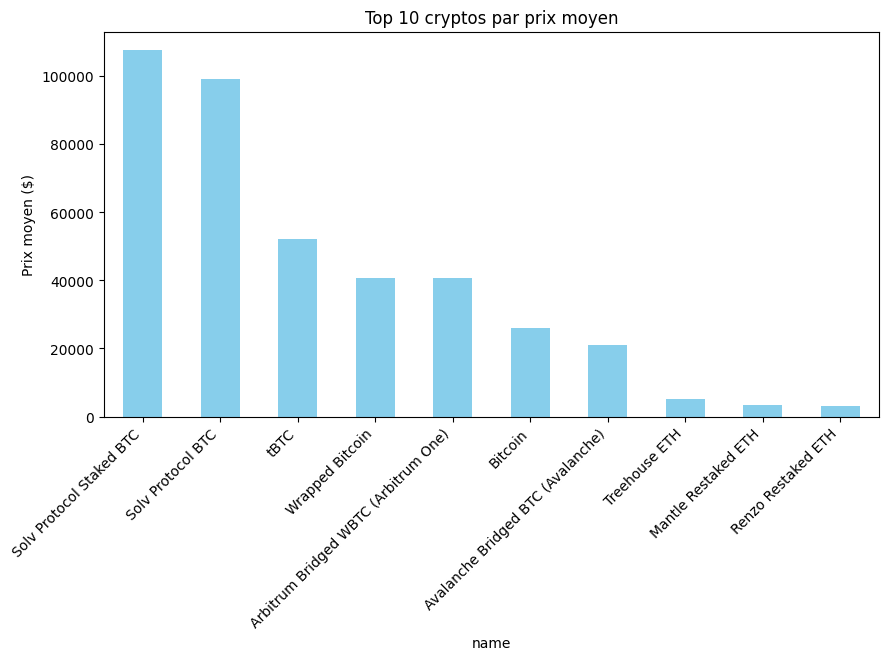

In [28]:
import matplotlib.pyplot as plt

# Calcul du prix moyen
mean_price = df.groupby('name')['close'].mean().sort_values(ascending=False).head(10)

# Graphique
plt.figure(figsize=(10,5))
mean_price.plot(kind='bar', color='skyblue')
plt.title("Top 10 cryptos par prix moyen")
plt.ylabel("Prix moyen ($)")
plt.xticks(rotation=45, ha='right')
plt.show()


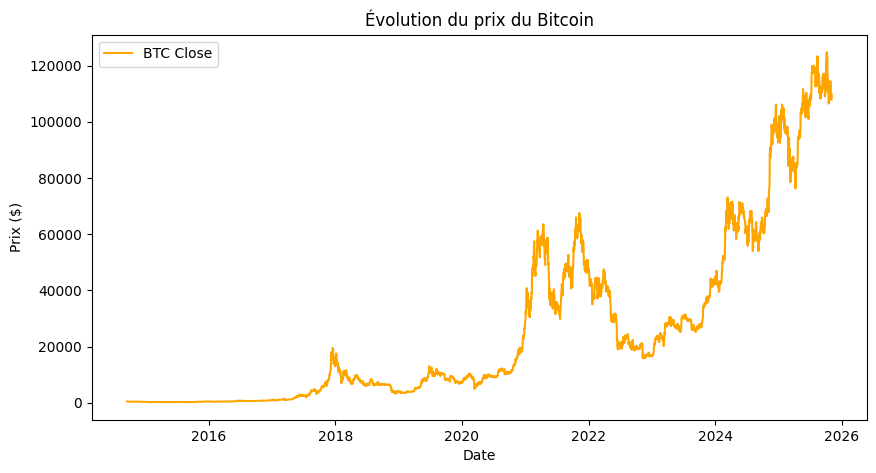

In [27]:
# Filtrer uniquement le Bitcoin
btc = df[df['ticker'] == 'BTC-USD']

plt.figure(figsize=(10,5))
plt.plot(btc['date'], btc['close'], label='BTC Close', color='orange')
plt.title("Évolution du prix du Bitcoin")
plt.xlabel("Date")
plt.ylabel("Prix ($)")
plt.legend()
plt.show()

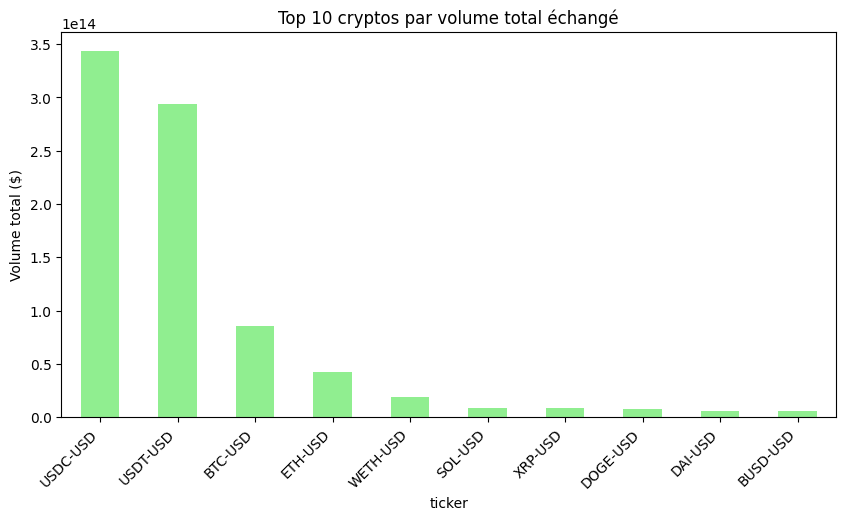

In [26]:
# Volume total sur toute la période
volume_total = df.groupby('ticker')['volume'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
volume_total.plot(kind='bar', color='lightgreen')
plt.title("Top 10 cryptos par volume total échangé")
plt.ylabel("Volume total ($)")
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
# Sauvegarde du dataset nettoyé
df.to_csv('/content/Crypto_Clean.csv', index=False)

print("Fichier 'Crypto_Clean.csv' créé avec succès !")


Fichier 'Crypto_Clean.csv' créé avec succès !


In [43]:
from google.colab import files
files.download('/content/crypto_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

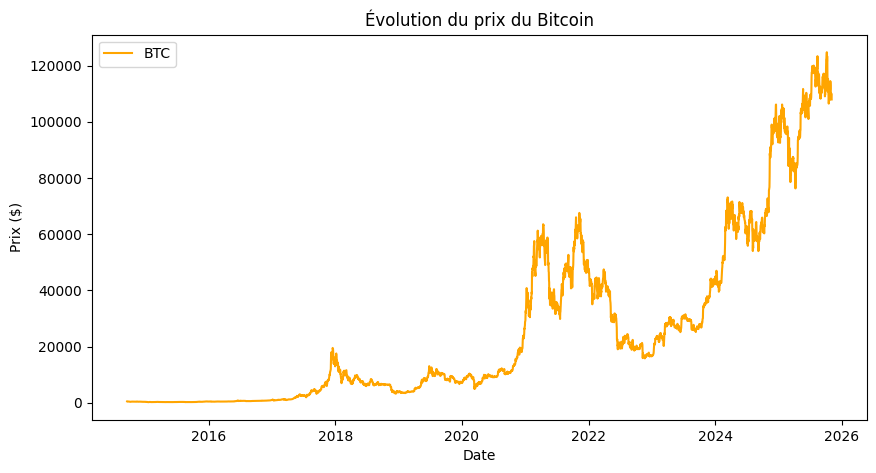

In [47]:
plt.figure(figsize=(10,5))
plt.plot(btc['date'], btc['close'], label='BTC', color='orange')
plt.title("Évolution du prix du Bitcoin")
plt.xlabel("Date")
plt.ylabel("Prix ($)")
plt.legend()
plt.savefig('/content/btc_evolution.png', bbox_inches='tight')
plt.show()

In [48]:
from google.colab import files
files.download('/content/btc_evolution.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ticker', 'name'], dtype='object')

In [59]:
# On normalise tous les noms de colonnes (en minuscules, sans espace)
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

print("Colonnes standardisées :")
print(df.columns.tolist()[:10])  # affiche les 10 premières colonnes

Colonnes standardisées :
['date', 'open', 'high', 'low', 'close', 'volume', 'ticker', 'name']


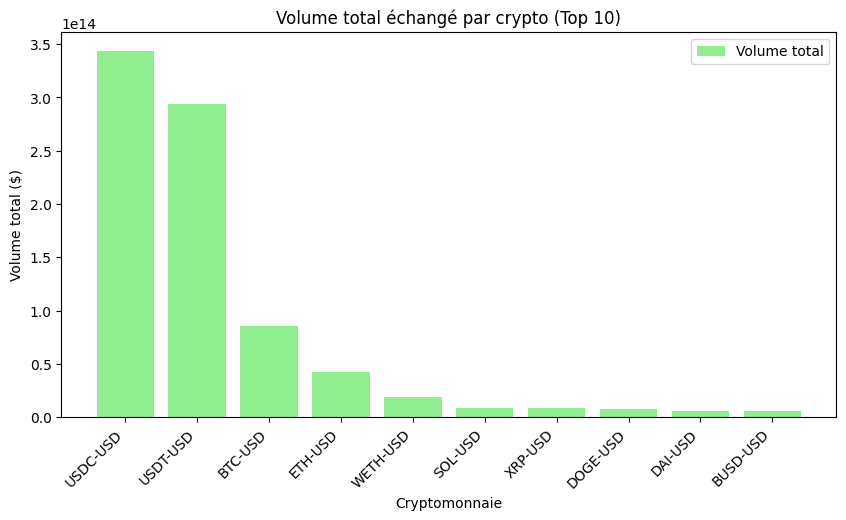

In [61]:
# 1️⃣ Volume total échangé
volume_total = df.groupby('ticker')['volume'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(volume_total.index, volume_total.values, color='lightgreen')
plt.title("Volume total échangé par crypto (Top 10)")
plt.xlabel("Cryptomonnaie")
plt.ylabel("Volume total ($)")
plt.xticks(rotation=45, ha='right')
plt.legend(["Volume total"])
plt.savefig('/content/volume_total.png', bbox_inches='tight')
plt.show()

In [75]:
# Créer un échantillon de 5000 lignes (tu peux ajuster)
df_sample = df.sample(n=5000, random_state=42)

# Sauvegarder ce fichier allégé
df_sample.to_csv('/content/crypto_clean_sample.csv', index=False)

print("Fichier allégé créé : crypto_clean_sample.csv")

Fichier allégé créé : crypto_clean_sample.csv
